CUSTOMER SEGMENTATION

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df_train=pd.read_csv('Train (1).csv')

In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [121]:
df_train['Agebins']=pd.cut(df_train['Age'],bins=[0, 18, 25, 35,46, 100], labels=['0-18', '19-25', '26-35', '36-46','47+'])
df_train.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Agebins
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,19-25
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,36-46
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,47+


In [122]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Agebins
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,19-25
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,36-46
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,47+
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,47+
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,36-46


In [126]:
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
Agebins              0
dtype: int64

Exploratory Data Analysis (EDA)

---



Segmentation based on Gender

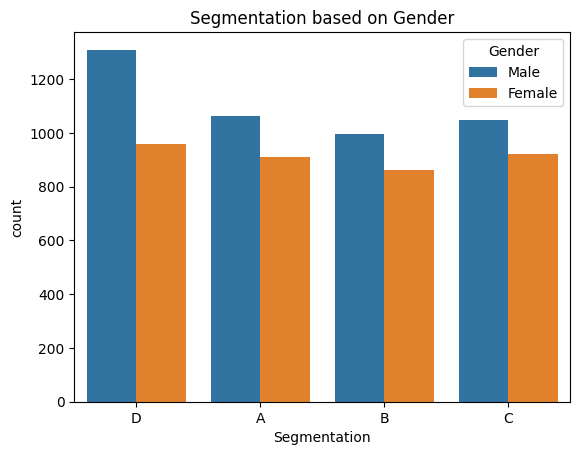

In [127]:
sns.countplot(x='Segmentation', hue='Gender', data=df_train)
plt.title("Segmentation based on Gender")
plt.show()

Segmentation based on Age

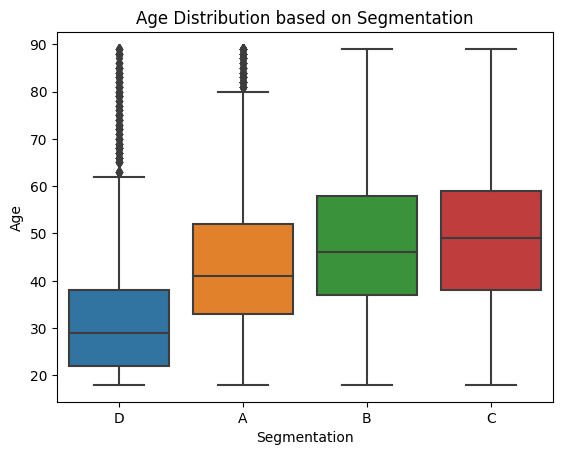

In [128]:
sns.boxplot(x='Segmentation', y='Age', data=df_train)
plt.title("Age Distribution based on Segmentation")
plt.show()

Work Experience vs Spending Score based on Segmentation

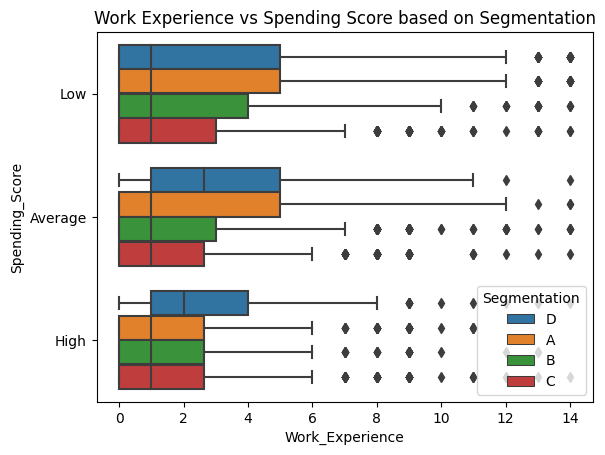

In [129]:
sns.boxplot(x='Work_Experience', y='Spending_Score', hue='Segmentation', data=df_train)
plt.title("Work Experience vs Spending Score based on Segmentation")
plt.show()

profession based on segmentation

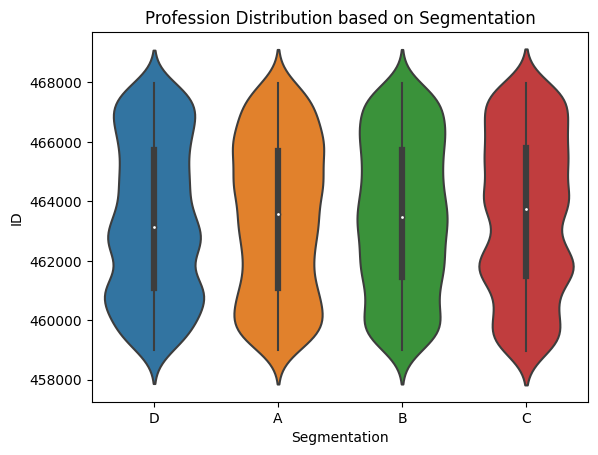

In [130]:
sns.violinplot(x='Segmentation', y='ID', data=df_train)
plt.title("Profession Distribution based on Segmentation")
plt.show()

Family Size based on Segmentation

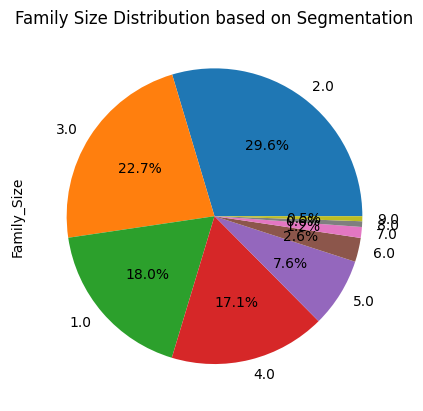

In [131]:
df_train['Family_Size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Family Size Distribution based on Segmentation")
plt.show()

Distribution of Age

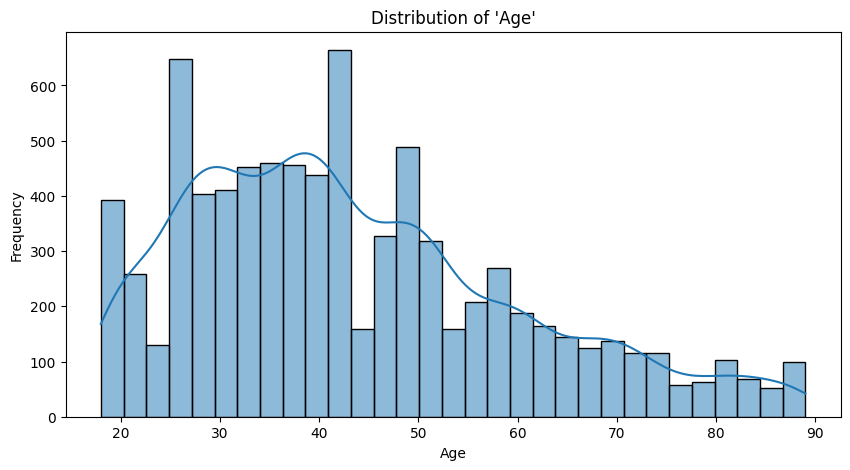

In [132]:
plt.figure(figsize=(10,5))
sns.histplot(df_train['Age'], kde=True)
plt.title("Distribution of 'Age'")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Distribution of Work Experience

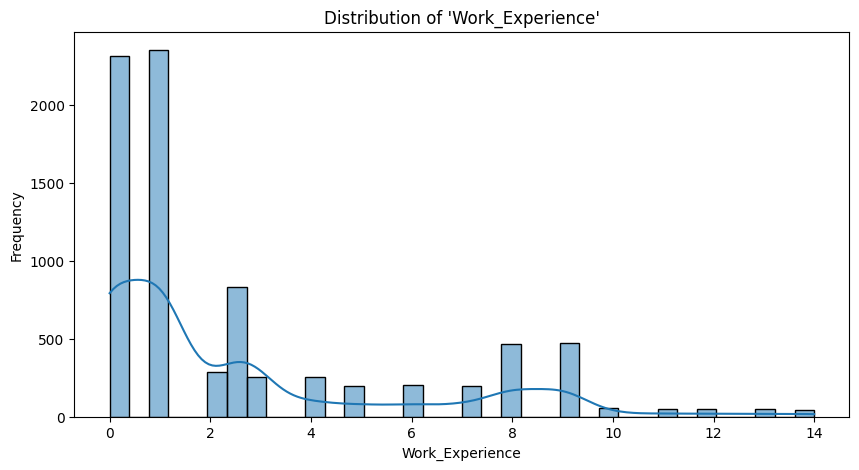

In [133]:
plt.figure(figsize=(10,5))
sns.histplot(df_train['Work_Experience'], kde=True)
plt.title("Distribution of 'Work_Experience'")
plt.xlabel("Work_Experience")
plt.ylabel("Frequency")
plt.show()

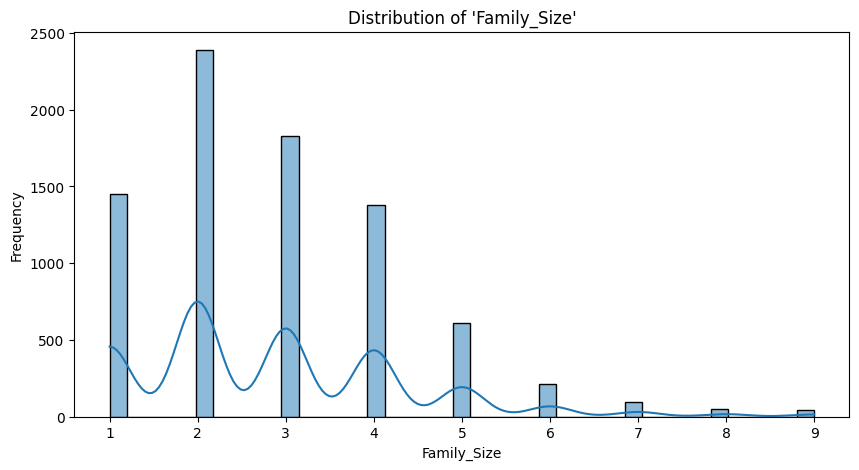

In [134]:
plt.figure(figsize=(10,5))
sns.histplot(df_train['Family_Size'], kde=True)
plt.title("Distribution of 'Family_Size'")
plt.xlabel("Family_Size")
plt.ylabel("Frequency")
plt.show()

correlation between features

<ipython-input-135-27074afcc491>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_train.corr()


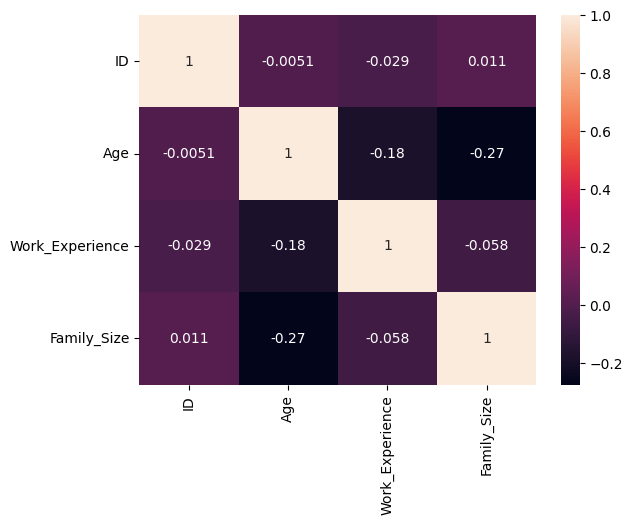

In [135]:
corr=df_train.corr()
sns.heatmap(corr,annot=True)
plt.show()



In [136]:
def groupby_count(df_train, groupby_cols, count_col, filter_cols=None):
    if filter_cols:
        df_train = df_train[filter_cols + groupby_cols + [count_col]]
    else:
        df_train = df_train[groupby_cols + [count_col]]
    return df_train.groupby(by=groupby_cols).count()


In [137]:
print(groupby_count(df_train, ['Spending_Score','Ever_Married'], 'ID') )

                               ID
Spending_Score Ever_Married      
Average        Yes           1937
High           Yes           1176
Low            No            3285
               Yes           1530


all average/high spending score are Married

In [138]:
print(groupby_count(df_train, ['Profession','Ever_Married'], 'ID') )

                              ID
Profession    Ever_Married      
Artist        No             713
              Yes           1774
Doctor        No             366
              Yes            311
Engineer      No             267
              Yes            415
Entertainment No             358
              Yes            579
Executive     No              37
              Yes            550
Healthcare    No            1153
              Yes            145
Homemaker     No             112
              Yes            128
Lawyer        No              40
              Yes            575
Marketing     No             189
              Yes             96


healthcare workers are mostly not married

In [139]:
print(groupby_count(df_train, ['Agebins','Ever_Married'], 'ID') )

                        ID
Agebins Ever_Married      
0-18    No             125
        Yes              4
19-25   No             771
        Yes             69
26-35   No            1360
        Yes            553
36-46   No             723
        Yes           1338
47+     No             306
        Yes           2679


47+ People are mostly married
19-25 People are mostly not married
26-35 People are mostly not married

In [142]:
print(groupby_count(df_train, ['Agebins','Graduated'], 'ID') )

                     ID
Agebins Graduated      
0-18    No          129
        Yes           1
19-25   No          744
        Yes         110
26-35   No          844
        Yes        1086
36-46   No          485
        Yes        1582
47+     No          820
        Yes        2189


0-18 People Are mostly not graduated
19-25 People are mostly not graduated
47+ People are mostly graduated

<Axes: xlabel='Profession', ylabel='count'>

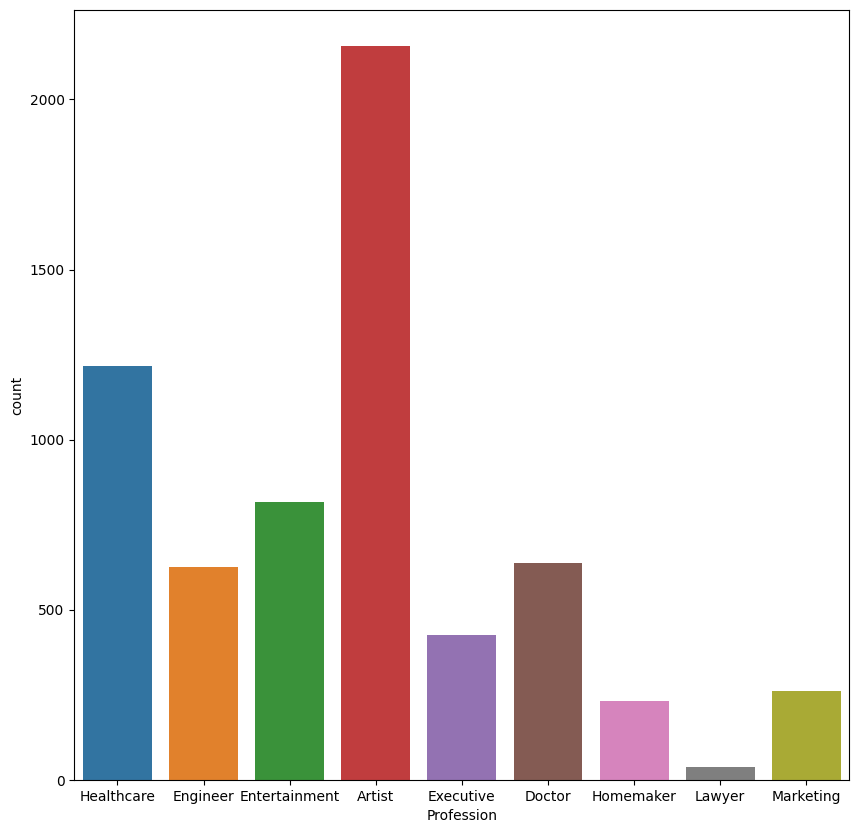

In [146]:
x=df_train.query("18<Age<60")
plt.figure(figsize=(10,10))
sns.countplot(x[["Profession"]],x="Profession")

In [147]:
print(groupby_count(x, ['Spending_Score','Profession'], 'ID') )

                                ID
Spending_Score Profession         
Average        Artist          863
               Doctor          158
               Engineer        195
               Entertainment   264
               Executive        65
               Healthcare       38
               Homemaker        57
               Lawyer            1
               Marketing        14
High           Artist          154
               Doctor           24
               Engineer         44
               Entertainment    30
               Executive       269
               Healthcare       45
               Homemaker        23
               Lawyer           17
               Marketing        25
Low            Artist         1139
               Doctor          456
               Engineer        387
               Entertainment   522
               Executive        91
               Healthcare     1134
               Homemaker       151
               Lawyer           19
               Marke

People that are between 18 to 60 years old :

Are mostly Artist if they have an average Spending_Score
Are mostly Executives if they have a High/Low Spending_Score

Data Preprocessing

In [123]:
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
Agebins              0
dtype: int64

In [124]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['Ever_Married']= label_encoder.fit_transform(df_train['Ever_Married'])
df_train['Graduated']= label_encoder.fit_transform(df_train['Graduated'])
df_train['Profession']= label_encoder.fit_transform(df_train['Profession'])


In [125]:
df_train['Ever_Married'].fillna(df_train['Ever_Married'].mode(),inplace=True)
df_train['Graduated'].fillna(df_train['Graduated'].mode(),inplace=True)
df_train['Profession'].fillna(df_train['Profession'].mode(),inplace=True)
df_train['Work_Experience'].fillna(df_train['Work_Experience'].mean(),inplace=True)
df_train['Family_Size'].fillna(df_train['Family_Size'].median(),inplace=True)
